# Storage Options

Amazon EC2 provides flexible, cost effective, and easy-to-use data storage options for your instances. Each option has a unique combination of performance and durability. These storage options can be used independently or in combination to suit your requirements. The image below shows the relationship between the storage options and your EC2 instances.

Choose each of the numbered markers to explore how the storage services interact with your instances. After you have selected the first marker, you can use the < > arrow keys to navigate through the remaining markers.

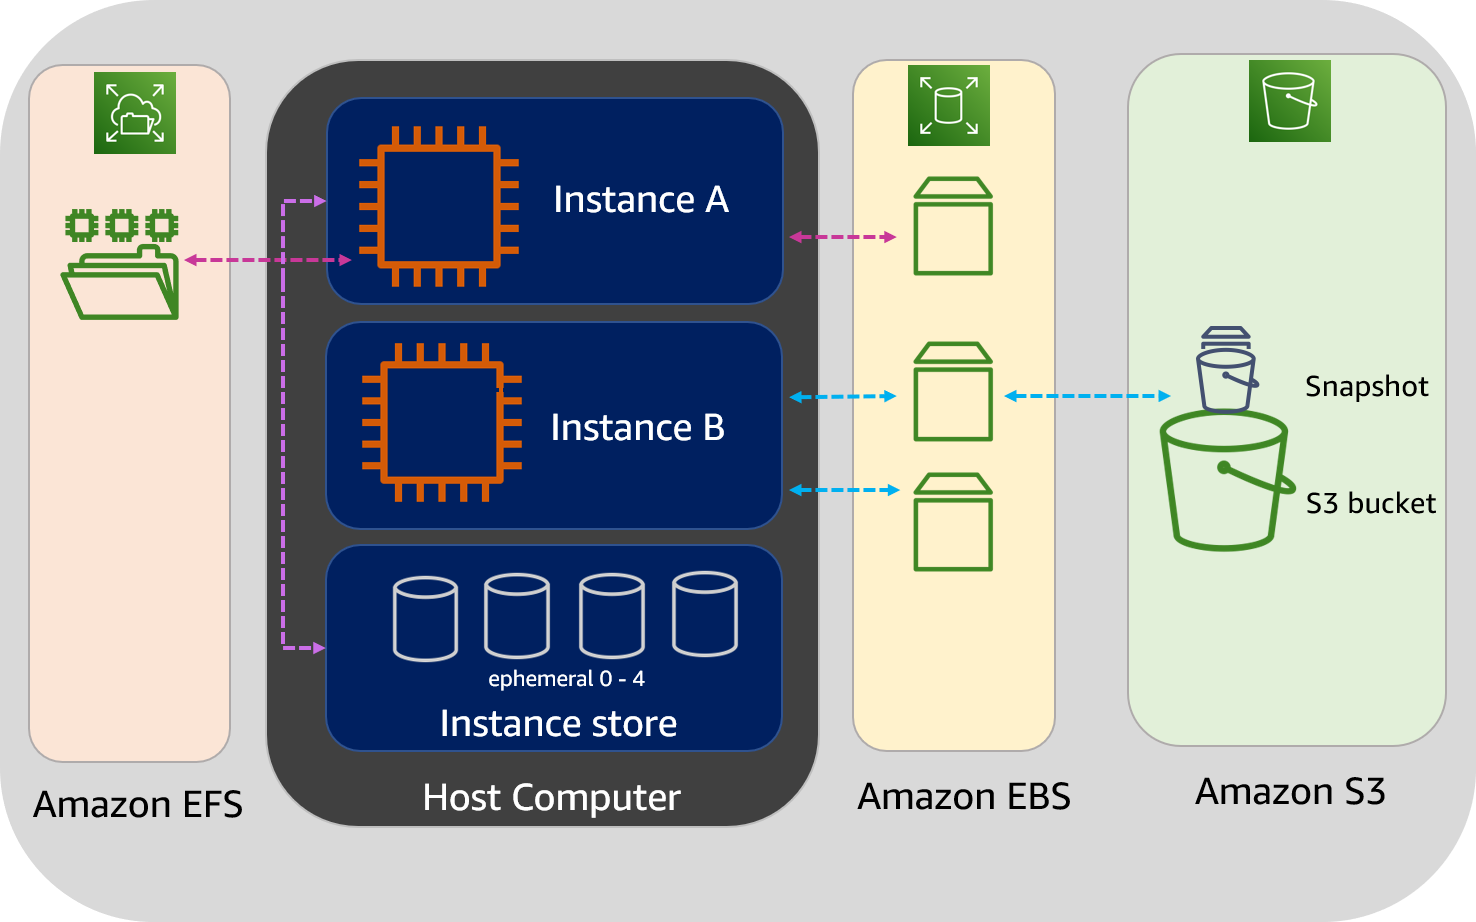



## Let's start at the beginning

The first choice John has to make is whether he needs the instance to retain storage information when and if an instance is stopped or rebooted. He first needs to understand how the root device helps the instance load its OS and how the different types of root devices store and maintain data.

## Storage for the root device

The root device volume (root device) for your instance contains the image used to boot the instance. You can launch an instance from either an instance store-backed AMI or an Amazon EBS-backed AMI. The description of an AMI includes which type of AMI it is; you'll see the root device referred to in some places as either ebs (all lowercase-for Amazon EBS-backed) or instance store (for instance store-backed). This is important because there are significant differences between what you can do with each type of AMI. 

### Instance store-backed instances
–
Instances that use instance stores for the root device automatically have one or more instance store volumes available, with one volume serving as the root device volume. When an instance is launched, the image that is used to boot the instance is copied to the root volume. Note that you can optionally use additional instance store volumes, depending on the instance type.

Any data on the instance store volumes persists as long as the instance is running, but this data is deleted when the instance is terminated (instance store-backed instances do not support the Stop action) or if it fails (such as if an underlying drive has issues).



After an instance store-backed instance fails or terminates, it cannot be restored. If you plan to use Amazon EC2 instance store-backed instances, we highly recommend that you distribute the data on your instance stores across multiple Availability Zones. You should also back up critical data from your instance store volumes to persistent storage on a regular basis.

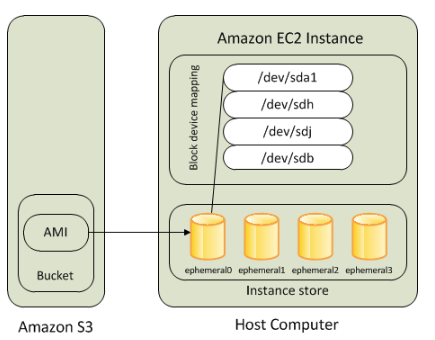

### Amazon EBS-backed instances
–
Instances that use Amazon EBS for the root device automatically have an Amazon EBS volume attached. When you launch an Amazon EBS-backed instance, an Amazon EBS volume is created for each Amazon EBS snapshot referenced by the AMI you use. You can optionally use other Amazon EBS volumes or instance store volumes, depending on the instance type. 



An Amazon EBS-backed instance can be stopped and later restarted without affecting data stored in the attached volumes. There are various instance and volume-related tasks you can do when an Amazon EBS-backed instance is in a stopped state. For example, you can modify the properties of the instance, change its size, or update the kernel it is using. You can attach your root volume to a different running instance for debugging or any other purpose.

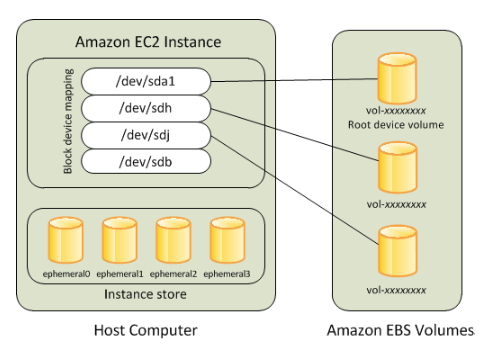



## Block device mapping

Your instance might include local storage volumes, known as instance store volumes, which you can configure at launch time with block device mapping. After these volumes have been added to and mapped on your instance, they are available for you to mount and use. If your instance fails, or if your instance is stopped or terminated, the data on these volumes is lost; therefore, these volumes are best used for temporary data. To keep important data safe, you should use a replication strategy across multiple instances or store your persistent data in Amazon S3 or Amazon EBS volumes. To learn more, visit Block device mapping(opens in a new tab) on the Elastic Compute Cloud User Guide.

## Instance store

You can specify instance store volumes for an instance only when you launch it. You can't detach an instance store volume from one instance and attach it to a different instance.

The data in an instance store persists only during the lifetime of its associated instance. If an instance reboots (intentionally or unintentionally), data in the instance store persists. However, data in the instance store is lost under any of the following circumstances:

- The underlying disk drive fails

- The instance stops

- The instance hibernates

- The instance terminates

Therefore, do not rely on instance store for valuable or long-term data. Instead, use more durable data storage, such as Amazon S3, Amazon EBS, or Amazon EFS.

When you stop, hibernate, or terminate an instance, every block of storage in the instance store is reset. Therefore, your data cannot be accessed through the instance store of another instance.

If you create an AMI from an instance, the data on its instance store volumes isn't preserved and isn't present on the instance store volumes of the instances that you launch from the AMI.

If you change the instance type, an instance store will not be attached to the new instance type.

## Amazon EBS volumes

Amazon EBS provides block level storage volumes for use with EC2 instances. After you attach a volume to an instance, you can use it as you would use a physical hard drive. EBS volumes are flexible. For current-generation volumes attached to current-generation instance types, you can dynamically increase size, modify the provisioned IOPS capacity, and change volume type on live production volumes.

There are many benefits of using EBS volumes. To review the important information you should understand before choosing a volume type, expand each of the following eight categories.

### Primary storage
–
You can use EBS volumes as primary storage for data that requires frequent updates, such as the system drive for an instance or storage for a database application. You can also use them for throughput-intensive applications that perform continuous disk scans. EBS volumes persist independently from the running life of an EC2 instance.

### Multiple volume types
–
Amazon EBS provides the following volume types: General Purpose SSD (gp2 and gp3), Provisioned IOPS SSD (io1 and io2), Throughput Optimized HDD (st1), Cold HDD (sc1), and Magnetic (standard). They differ in performance characteristics and price, so you can tailor your storage performance and cost to the needs of your applications.

### Multiple volumes per instance
–
You can attach multiple EBS volumes to a single instance. The volume and instance must be in the same Availability Zone. Depending on the volume and instance types, you can use Multi-Attach to mount a volume to multiple instances at the same time.

### Data availability
–
When you create an EBS volume, it is automatically replicated within its Availability Zone to prevent data loss because of failure of any single hardware component. 



You can attach an EBS volume to any EC2 instance in the same Availability Zone. After you attach a volume, it appears as a native block device similar to a hard drive or other physical device. At that point, the instance can interact with the volume just as it would with a local drive. You can connect to the instance and format the EBS volume with a file system, such as ext3, and then install applications.



If you attach multiple volumes to a device that you have named, you can stripe data across the volumes for increased I/O and throughput performance.

### Data persistence
–
An EBS volume is off-instance storage that can persist independently from the life of an instance. You continue to pay for the volume usage as long as the data persists.



EBS volumes that are attached to a running instance can automatically detach from the instance with their data intact when the instance is terminated if you uncheck the Delete on Termination check box when you configure EBS volumes for your instance on the EC2 console. The volume can then be reattached to a new instance for quick recovery. If the check box for Delete on Termination is checked, the volume(s) will delete upon termination of the EC2 instance. 



If you are using an Amazon EBS-backed instance, you can stop and restart that instance without affecting the data stored in the attached volume. The volume remains attached throughout the stop-start cycle. This helps you to process and store the data on your volume indefinitely, only using the processing and storage resources when required. The data persists on the volume until the volume is deleted explicitly.

### Data encryption
–
You can create encrypted EBS volumes with the Amazon EBS encryption feature. All EBS volume types support encryption. You can use encrypted EBS volumes to meet a wide range of data at rest encryption requirements for regulated or audited data and applications.



Amazon EBS encryption uses 256-bit Advanced Encryption Standard algorithms (AES-256) and an AWS managed key infrastructure. The encryption occurs on the server that hosts the EC2 instance, providing encryption of data in transit from the EC2 instance to Amazon EBS storage.

### Flexibility
–
EBS volumes support live configuration changes while in production. You can modify volume type, volume size, and IOPS capacity without service interruptions.

### Snapshots
–
Amazon EBS provides the ability to create snapshots (backups) of any EBS volume and write a copy of the data in the volume to Amazon S3, where it is stored redundantly in multiple Availability Zones. The volume does not need to be attached to a running instance to take a snapshot. 



As you continue to write data to a volume, you can periodically create a snapshot of the volume to use as a baseline for new volumes. These snapshots can be used to create multiple new EBS volumes or move volumes across Availability Zones. Snapshots of encrypted EBS volumes are automatically encrypted.

## Boot times differences

Instances launched from an Amazon EBS-backed AMI launch faster than instances launched from an instance store-backed AMI. When you launch an instance from an instance store-backed AMI, all the parts have to be retrieved from Amazon S3 before the instance is available. With an Amazon EBS-backed AMI, only the parts required to boot the instance need to be retrieved from the snapshot before the instance is available. However, the performance of an instance that uses an EBS volume for its root device is slower for a short time while the remaining parts are retrieved from the snapshot and loaded into the volume. When you stop and restart the instance, it launches quickly, because the state is stored in an EBS volume. 

## Difference to consider before making a choice

The following chart compares the performance differences and limitations between an Amazon EBS-back AMIs and Amazon instance store-backed AMIs. It's important to understand the different features so that you can make the right choice for you workloads.

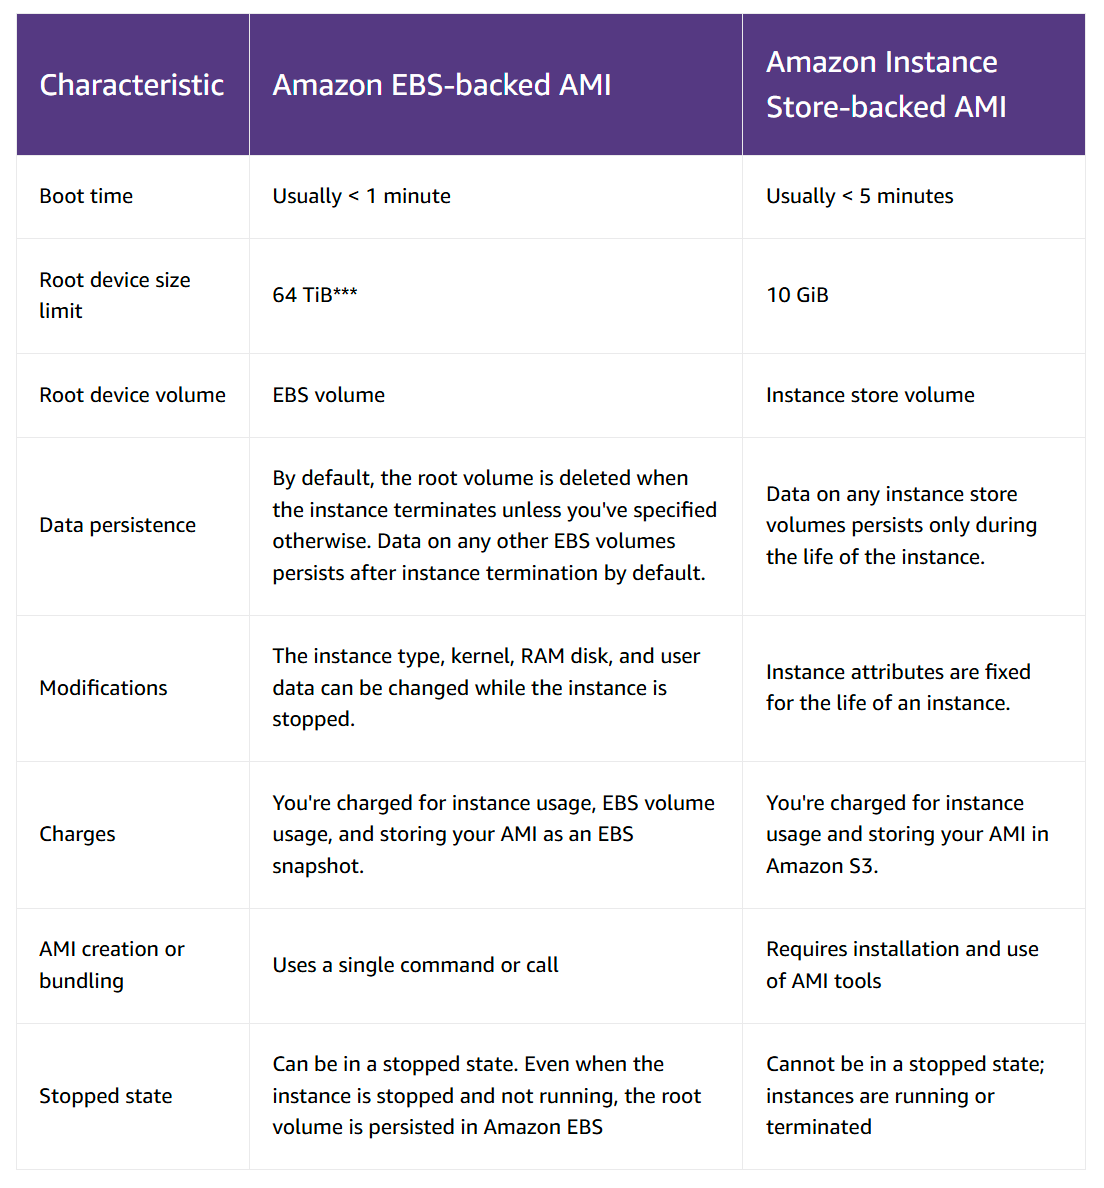

## File storage options

Cloud file storage is a method for storing data in the cloud that provides servers and applications access to data through shared file systems. This compatibility makes cloud file storage ideal for workloads that rely on shared file systems and provides simple integration without code changes.

There are many file storage solutions that exist, ranging from a single node file server on a compute instance using block storage as the underpinnings with no scalability or few redundancies to protect the data, to a do-it-yourself clustered solution, to a fully managed solution. To learn more, expand each of the following three categories.

### Amazon S3
–
Amazon S3 is a repository for internet data. Amazon S3 provides access to reliable, fast, and inexpensive data storage infrastructure. It is designed to make web-scale computing easier by helping you to store and retrieve any amount of data, at any time, from within Amazon EC2 or anywhere on the web. Amazon S3 stores data objects redundantly on multiple devices across multiple facilities and permits concurrent read or write access to these data objects by many separate clients or application threads. You can use the redundant data stored in Amazon S3 to recover quickly and reliably from instance or application failures. 



Amazon EC2 uses Amazon S3 for storing Amazon Machine Images (AMIs). You use AMIs for launching EC2 instances. In case of instance failure, you can use the stored AMI to immediately launch another instance, which provides for fast recovery and business continuity.

Amazon EC2 also uses Amazon S3 to store snapshots (backup copies) of the data volumes. You can use snapshots for recovering data quickly and reliably in case of application or system failures. You can also use snapshots as a baseline to create multiple new data volumes, expand the size of an existing data volume, or move data volumes across multiple Availability Zones, thereby making your data usage highly scalable.

### Amazon EFS
–
Amazon EFS provides scalable file storage for use with Amazon EC2. You can use an EFS file system as a common data source for workloads and applications running on multiple instances. 

You can create an EFS file system and mount it to your instance at the time of launch using the Amazon EFS Quick Create feature of the Instance Launch Wizard. Amazon EFS is not supported on Windows instances.



Security configuration requirements:

- You need to create a security group to associate with both the EC2 instances and EFS mount target and then add the following rules:

    - Allow inbound SSH connections to the EC2 instances from your computer (the source is the CIDR block for your network).

    - Allow inbound NFS connections to the file system through the EFS mount target from the EC2 instances that are associated with this security group (the source is the security group itself).

- Create a key pair. You must specify a key pair when you configure your instances or you can't connect to them. 

### Amazon FSx
–
The Amazon FSx family of services makes it easy to launch, run, and scale shared storage powered by popular commercial and open-source file systems. You can use the new launch instance wizard to automatically attach the following types of Amazon FSx file systems to your Amazon EC2 instances at launch:

- Amazon FSx for NetApp ONTAP provides fully managed shared storage in the AWS Cloud with the popular data access and management capabilities of NetApp ONTAP.

- Amazon FSx for OpenZFS provides fully managed, cost-effective shared storage powered by the popular OpenZFS file system.

Note: 

Amazon FSx for Windows File Server and Amazon FSx for Lustre file systems can't be mounted at launch. You must mount these file systems manually after launch.

